In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.ensemble
import sklearn.metrics

In [5]:
df_district = pd.read_csv('Bagerhat_historical_weather_1980_2024.csv')

In [6]:
df_district.describe()

,day,month,year,temperature(degree C),feels_like(degree C),max_temperature(degree C),minimum_temperature(degree C),humidity,precipitation,windspeed,atmospheric_pressure,UV,solar_radiation,dew_point
count,16437.000000,16437.000000,16437.000000,10478.000000,10478.000000,14991.000000,14991.000000,10478.000000,5479.000000,11924.000000,7115.000000,4038.000000,4038.000000,10478.000000
mean,15.730243,6.522723,2002.000000,25.894894,29.129691,20.938530,15.808498,81.597137,4.723946,8.613334,1008.247646,7.029965,191.903096,22.121989
std,8.800616,3.448865,12.988187,4.332450,7.149669,14.130182,11.276950,8.622714,10.107510,7.681203,5.647070,1.639506,54.105023,4.895923
min,1.000000,1.000000,1980.000000,3.100000,-0.300000,0.000000,-19.900000,38.900000,0.000000,0.000000,982.700000,0.000000,0.000000,3.100000
25%,8.000000,4.000000,1991.000000,22.800000,23.000000,0.000000,0.000000,76.500000,0.000000,0.000000,1003.800000,6.000000,164.900000,18.100000
50%,16.000000,7.000000,2002.000000,27.400000,30.000000,28.100000,19.700000,82.400000,0.400000,9.000000,1008.600000,7.000000,195.850000,24.100000
75%,23.000000,10.000000,2013.000000,29.100000,35.100000,31.800000,26.100000,87.400000,5.600000,13.000000,1013.000000,8.000000,227.300000,26.200000
max,31.000000,12.000000,2024.000000,38.100000,58.800000,41.000000,38.100000,100.000000,192.800000,103.700000,1088.100000,10.000000,308.700000,31.100000


In [7]:
df_district_storm_risk= df_district['atmospheric_pressure'].count()
df_district_storm_risk= df_district['windspeed'].count()
print (f"atmospheric_pressure has : {df_district_storm_risk}")
print (f"windspeed has : {df_district_storm_risk}")

atmospheric_pressure has : 11924
windspeed has : 11924


# Features for strom risk

In [8]:
desired_column = ['day', 'month', 'year','atmospheric_pressure','windspeed']
# desired_column = ['day', 'month', 'year','temperature(degree C)','humidity','atmospheric_pressure'] 
atmospheric_pressure_df_district = df_district[desired_column]

atmospheric_pressure_df_district.head()

,day,month,year,atmospheric_pressure,windspeed
0,1,1,1980,1013.0,3.6
1,2,1,1980,1012.9,5.4
2,3,1,1980,1013.0,16.6
3,4,1,1980,1014.2,18.4
4,5,1,1980,1015.1,11.2


In [9]:
with_no_null_atmospheric_pressure = atmospheric_pressure_df_district.dropna()
print(f"After removing missing values from bagerhat, dataset contains {with_no_null_atmospheric_pressure.shape[0]} rows and {with_no_null_atmospheric_pressure.shape[1]} columns out of {with_no_null_atmospheric_pressure.shape[0]} rows.")
with_no_null_atmospheric_pressure.head(20)

After removing missing values from bagerhat, dataset contains 7115 rows and 5 columns out of 7115 rows.


,day,month,year,atmospheric_pressure,windspeed
0,1,1,1980,1013.0,3.6
1,2,1,1980,1012.9,5.4
2,3,1,1980,1013.0,16.6
3,4,1,1980,1014.2,18.4
4,5,1,1980,1015.1,11.2
5,6,1,1980,1014.9,14.8
6,7,1,1980,1015.5,27.7
7,8,1,1980,1016.3,22.3
10,11,1,1980,1014.6,0.0
13,14,1,1980,1013.9,14.8


In [10]:
with_no_null_atmospheric_pressure.describe()

,day,month,year,atmospheric_pressure,windspeed
count,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000
mean,15.712017,6.551651,2011.227266,1008.247646,11.609515
std,8.814801,3.479119,11.949238,5.647070,6.259136
min,1.000000,1.000000,1980.000000,982.700000,0.000000
25%,8.000000,4.000000,2010.000000,1003.800000,8.300000
50%,16.000000,7.000000,2015.000000,1008.600000,11.200000
75%,23.000000,10.000000,2020.000000,1013.000000,14.800000
max,31.000000,12.000000,2024.000000,1088.100000,103.700000


# time series anaysis

Date range: 1980-01-01 to 2024-12-31


C:\Users\User\AppData\Local\Temp\ipykernel_17036\240606231.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_no_null_atmospheric_pressure['date'] = pd.to_datetime(


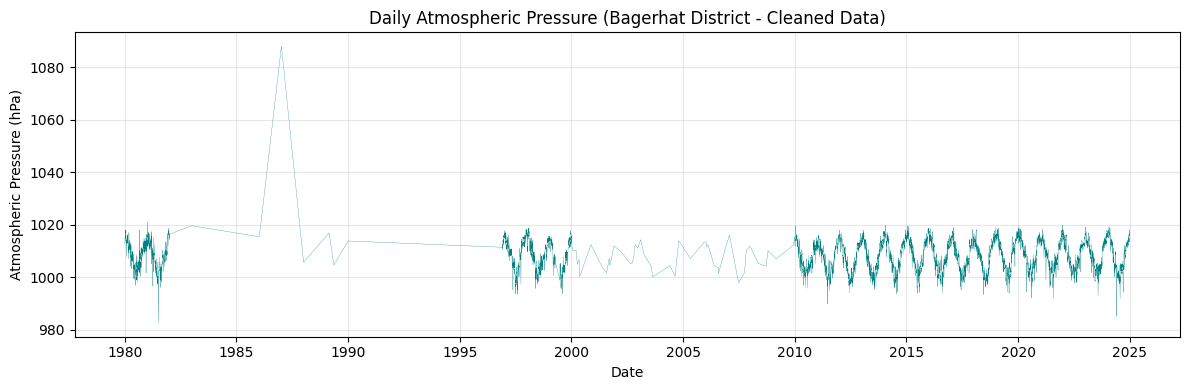

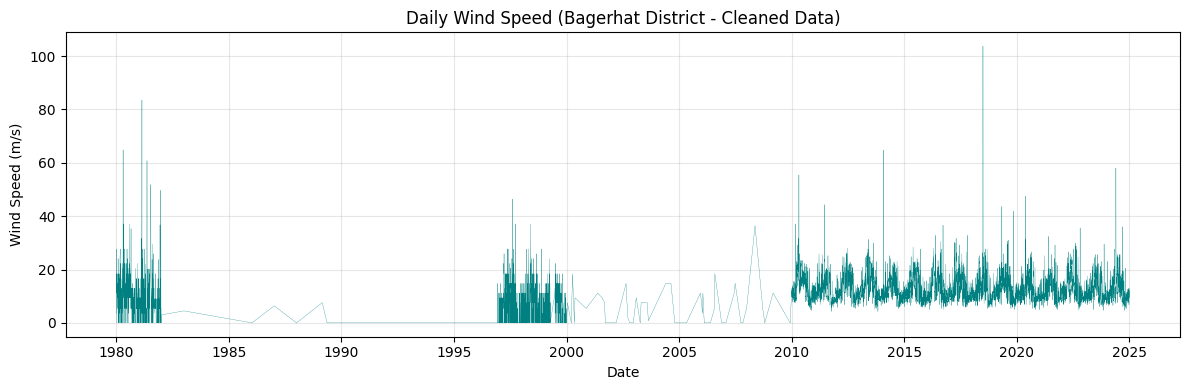

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure a datetime column exists
if 'date' not in with_no_null_atmospheric_pressure.columns:
    with_no_null_atmospheric_pressure['date'] = pd.to_datetime(
        with_no_null_atmospheric_pressure[['year', 'month', 'day']]
    )

# Show date range
min_date = with_no_null_atmospheric_pressure['date'].min()
max_date = with_no_null_atmospheric_pressure['date'].max()
print(f"Date range: {min_date.date()} to {max_date.date()}")

# Plot daily atmospheric pressure time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null_atmospheric_pressure['date'], with_no_null_atmospheric_pressure[['atmospheric_pressure']],
         linewidth=0.2, color='teal')
plt.xlabel('Date')
plt.ylabel('Atmospheric Pressure (hPa)')
plt.title('Daily Atmospheric Pressure (Bagerhat District - Cleaned Data)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot daily windspeed time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null_atmospheric_pressure['date'], with_no_null_atmospheric_pressure[['windspeed']],
         linewidth=0.2, color='teal')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.title('Daily Wind Speed (Bagerhat District - Cleaned Data)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Random Forest for atmosphere pressure

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Start from your *clean* dataframe (the one that already has no NaNs)
# ------------------------------------------------------------------
df = with_no_null_atmospheric_pressure.copy()          # <-- your cleaned data

# ------------------------------------------------------------------
# 2. Keep only the columns you care about
# ------------------------------------------------------------------
desired_column = ['day', 'month', 'year', 'atmospheric_pressure','windspeed']  # <-- only these columns

# If any of the predictor columns are missing, pandas will raise a clear error
df = df[desired_column]

# ------------------------------------------------------------------
# 3. (Optional) Build a proper datetime column – useful for later plots
# ------------------------------------------------------------------
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# ------------------------------------------------------------------
# 4. Define FEATURES and TARGET
# ------------------------------------------------------------------
FEATURES = ['day', 'month', 'year']   # <-- only these two
TARGET   = ['atmospheric_pressure','windspeed']

X = df[FEATURES]
y = df[TARGET].astype(float)

# ------------------------------------------------------------------
# 5. Train / test split
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

# ------------------------------------------------------------------
# 6. Random Forest (a few sensible defaults)
# ------------------------------------------------------------------
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ------------------------------------------------------------------
# 7. Predictions & classic metrics
# ------------------------------------------------------------------
y_pred = rf.predict(X_test)

rf_r2  = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)

def tolerance_accuracy(y_true, y_hat, tol):
    return 100 * (np.abs(y_true - y_hat) <= tol).mean()

rf_acc_05 = tolerance_accuracy(y_test.values, y_pred, 0.5)
rf_acc_10 = tolerance_accuracy(y_test.values, y_pred, 1.0)
rf_acc_20 = tolerance_accuracy(y_test.values, y_pred, 2.0)
rf_acc_30 = tolerance_accuracy(y_test.values, y_pred, 3.0)

print("=== Random Forest – Dew-Point Prediction (Test) ===")
print(f"R²          : {rf_r2:.4f}")
print(f"RMSE        : {rf_rmse:.3f} °C")
print(f"MSE         : {rf_mse:.4f}")
print("Accuracy (± tolerance):")
print(f"  ±0.5 °C : {rf_acc_05:5.2f}%")
print(f"  ±1.0 °C : {rf_acc_10:5.2f}%")
print(f"  ±2.0 °C : {rf_acc_20:5.2f}%")
print(f"  ±3.0 °C : {rf_acc_30:5.2f}%")

# ------------------------------------------------------------------
# 8. 5-fold CV (R²)
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_r2 = cross_val_score(rf, X, y, cv=cv, scoring='r2', n_jobs=-1) # make it error free usama 

print("\n=== 5-Fold CV R² ===")
print(f"Mean : {rf_cv_r2.mean():.4f}  (±{rf_cv_r2.std():.4f})")
print(f"Scores: {np.round(rf_cv_r2, 4)}")

# ------------------------------------------------------------------
# 9. Feature importances
# ------------------------------------------------------------------
fi = pd.DataFrame({
    'feature'   : FEATURES,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Feature Importances ===")
print(fi.to_string(index=False))

###########
# when n_estimators=500, max_depth=15 ---> 0.8697 R2 score
# when n_estimators=500, max_depth=None ---> 0.8548 R2 score


=== Random Forest – Dew-Point Prediction (Test) ===
R²          : 0.5974
RMSE        : 3.942 °C
MSE         : 15.5426
Accuracy (± tolerance):
  ±0.5 °C : 22.80%
  ±1.0 °C : 41.64%
  ±2.0 °C : 67.04%
  ±3.0 °C : 79.06%

=== 5-Fold CV R² ===
Mean : 0.6338  (±0.0241)
Scores: [0.5954 0.6539 0.6619 0.6192 0.6388]

=== Feature Importances ===
feature  importance
  month    0.484298
   year    0.271962
    day    0.243740


# Random Forest for atm pressure Fourier

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Start from your *clean* dataframe
# ------------------------------------------------------------------
df = with_no_null_atmospheric_pressure.copy()

# ------------------------------------------------------------------
# 2. Keep only the columns you care about + date components
# ------------------------------------------------------------------
desired_column = ['day', 'month', 'year','atmospheric_pressure','windspeed']
df = df[desired_column]

# ------------------------------------------------------------------
# 3. Create proper datetime
# ------------------------------------------------------------------
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.sort_values('date').reset_index(drop=True)

# ------------------------------------------------------------------
# 4. Add Fourier Features for Seasonality
# ------------------------------------------------------------------
# We'll add:
# - Daily cycle: sin/cos of (2π * day_of_year / 365.25)
# - (Optional) Intra-day if you had hour, but you don't → skip

def add_fourier_features(df, col, period, n_terms=3):
    """
    Add sin/cos terms for a periodic column.
    period: 365.25 for yearly, 7 for weekly, etc.
    n_terms: number of (sin, cos) pairs
    """
    for n in range(1, n_terms + 1):
        df[f'{col}_sin_{n}'] = np.sin(2 * np.pi * n * df[col] / period)
        df[f'{col}_cos_{n}'] = np.cos(2 * np.pi * n * df[col] / period)
    return df

# Day of year for annual cycle
df['day_of_year'] = df['date'].dt.dayofyear

# Add yearly Fourier terms (3 pairs = 6 features)
df = add_fourier_features(df, 'day_of_year', period=365.25, n_terms=3)

# Optional: weekly cycle (if data has enough resolution)
# df['day_of_week'] = df['date'].dt.dayofweek
# df = add_fourier_features(df, 'day_of_week', period=7, n_terms=1)

# ------------------------------------------------------------------
# 5. Define FEATURES and TARGET
# ------------------------------------------------------------------
fourier_cols = [col for col in df.columns if col.startswith(('day_of_year_sin', 'day_of_year_cos'))]

FEATURES = ['day','month','year'] + fourier_cols
TARGET   = ['atmospheric_pressure','windspeed']

X = df[FEATURES]
y = df[TARGET].astype(float)

# ------------------------------------------------------------------
# 6. Train / test split (time-aware optional, but random is fine if shuffled)
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

# ------------------------------------------------------------------
# 7. Random Forest
# ------------------------------------------------------------------
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ------------------------------------------------------------------
# 8. Predictions & Metrics
# ------------------------------------------------------------------
y_pred = rf.predict(X_test)

rf_r2_f  = r2_score(y_test, y_pred)
rf_mse_f = mean_squared_error(y_test, y_pred)
rf_rmse_f = np.sqrt(rf_mse_f)

def tolerance_accuracy(y_true, y_hat, tol):
    return 100 * (np.abs(y_true - y_hat) <= tol).mean()

rf_acc_05_f = tolerance_accuracy(y_test.values, y_pred, 0.5)
rf_acc_10_f = tolerance_accuracy(y_test.values, y_pred, 1.0)
rf_acc_20_f = tolerance_accuracy(y_test.values, y_pred, 2.0)
rf_acc_30_f = tolerance_accuracy(y_test.values, y_pred, 3.0)

print("=== Random Forest + Fourier – atmospheric pressure Prediction (Test) ===")
print(f"R²          : {rf_r2_f:.4f}")
print(f"RMSE        : {rf_rmse_f:.3f} hPa")
print(f"MSE         : {rf_mse_f:.4f}")
print("Accuracy (± tolerance):")
print(f"  ±0.5 hPa : {rf_acc_05_f:5.2f}%")
print(f"  ±1.0 hPa : {rf_acc_10_f:5.2f}%")
print(f"  ±2.0 hPa : {rf_acc_20_f:5.2f}%")
print(f"  ±3.0 hPa : {rf_acc_30_f:5.2f}%")

# ------------------------------------------------------------------
# 9. 5-fold CV (R²)
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_r2_f = cross_val_score(rf, X, y, cv=cv, scoring='r2', n_jobs=-1)

print("\n=== 5-Fold CV R² (with Fourier) ===")
print(f"Mean : {rf_cv_r2_f.mean():.4f}  (±{rf_cv_r2_f.std():.4f})")
print(f"Scores: {np.round(rf_cv_r2_f, 4)}")
# ------------------------------------------------------------------
# 10. Feature Importances
# ------------------------------------------------------------------
fi = pd.DataFrame({
    'feature'   : FEATURES,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Feature Importances (Top 10) ===")
print(fi.head(10).to_string(index=False))

=== Random Forest + Fourier – atmospheric pressure Prediction (Test) ===
R²          : 0.6111
RMSE        : 3.875 hPa
MSE         : 15.0157
Accuracy (± tolerance):
  ±0.5 hPa : 22.59%
  ±1.0 hPa : 41.18%
  ±2.0 hPa : 65.53%
  ±3.0 hPa : 77.90%

=== 5-Fold CV R² (with Fourier) ===
Mean : 0.6294  (±0.0161)
Scores: [0.61   0.647  0.6483 0.6138 0.6279]

=== Feature Importances (Top 10) ===
          feature  importance
day_of_year_cos_1    0.431130
             year    0.251601
              day    0.069147
day_of_year_cos_2    0.067947
day_of_year_sin_1    0.054273
day_of_year_sin_2    0.045049
day_of_year_sin_3    0.041130
day_of_year_cos_3    0.035742
            month    0.003981


# XG Boost normal

In [14]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Use your cleaned DataFrame
# ------------------------------------------------------------------
df = with_no_null_atmospheric_pressure.copy()

# ------------------------------------------------------------------
# 2. Keep only required columns
# ------------------------------------------------------------------
desired_column = ['day', 'month', 'year', 'atmospheric_pressure']
df = df[desired_column]

# ------------------------------------------------------------------
# 3. Create date (optional, for plots)
# ------------------------------------------------------------------
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# ------------------------------------------------------------------
# 4. Define Features & Target
# ------------------------------------------------------------------
FEATURES = ['day', 'month', 'year']
TARGET = 'atmospheric_pressure'

X = df[FEATURES]
y = df[TARGET].astype(float)

# ------------------------------------------------------------------
# 5. Train/Test Split
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# ------------------------------------------------------------------
# 6. XGBoost Regressor
# ------------------------------------------------------------------
xgb_model = xgb.XGBRegressor(
    n_estimators=500,        # More trees = better (but slower)
    learning_rate=0.05,      # Smaller steps → better generalization
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,           # Use 80% of data per tree
    colsample_bytree=0.8,    # Use 80% of features per tree
    random_state=42,
    n_jobs=-1,
    objective='reg:squarederror'
)
xgb_model.fit(X_train, y_train)

# ------------------------------------------------------------------
# 7. Predictions
# ------------------------------------------------------------------
y_pred = xgb_model.predict(X_test)

# ------------------------------------------------------------------
# 8. Metrics
# ------------------------------------------------------------------
xgb_r2 = r2_score(y_test, y_pred)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return 100 * float((np.abs(y_true - y_hat) <= tol).mean())

xgb_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
xgb_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
xgb_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
xgb_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== XGBoost – atmospheric pressure Prediction (Test Set) ====")
print(f"R²           : {xgb_r2:.4f}")
print(f"RMSE         : {xgb_rmse:.3f} hPa")
print(f"MSE          : {xgb_mse:.4f}")
print("Accuracy (± tolerance):")
print(f"  ±0.5°C : {xgb_acc_05:6.2f}%")
print(f"  ±1.0°C : {xgb_acc_10:6.2f}%")
print(f"  ±2.0°C : {xgb_acc_20:6.2f}%")
print(f"  ±3.0°C : {xgb_acc_30:6.2f}%")

# ------------------------------------------------------------------
# 9. 5-Fold Cross-Validation
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_cv_r2 = cross_val_score(xgb_model, X, y, cv=cv, scoring='r2', n_jobs=-1)

print("\n==== 5-Fold CV R² (XGBoost) ====")
print(f"Mean R² : {xgb_cv_r2.mean():.4f}  (±{xgb_cv_r2.std():.4f})")
print(f"Scores  : {np.round(xgb_cv_r2, 4)}")

# ------------------------------------------------------------------
# 10. Feature Importances
# ------------------------------------------------------------------
fi = pd.DataFrame({
    'feature': FEATURES,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n==== XGBoost Feature Importances ====")
print(fi.to_string(index=False))




==== XGBoost – atmospheric pressure Prediction (Test Set) ====
R²           : 0.7221
RMSE         : 2.890 hPa
MSE          : 8.3514
Accuracy (± tolerance):
  ±0.5°C :  18.62%
  ±1.0°C :  37.53%
  ±2.0°C :  64.37%
  ±3.0°C :  84.40%

==== 5-Fold CV R² (XGBoost) ====
Mean R² : 0.7988  (±0.0557)
Scores  : [0.7213 0.8507 0.8463 0.7414 0.8344]

==== XGBoost Feature Importances ====
feature  importance
  month    0.877461
   year    0.078729
    day    0.043811


# XG Boost Model using forier

In [15]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Use your cleaned DataFrame
# ------------------------------------------------------------------
df = with_no_null_atmospheric_pressure.copy()

# ------------------------------------------------------------------
# 2. Keep only required columns
# ------------------------------------------------------------------
desired_column = ['day', 'month', 'year', 'atmospheric_pressure'] 
df = df[desired_column]

# ------------------------------------------------------------------
# 3. Create date (optional, for plots)
# ------------------------------------------------------------------
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

    # ------------------------------------------------------------------
# 3.5 Add Fourier Seasonal Features
# ------------------------------------------------------------------

# Sort by date to ensure correct ordering
df = df.sort_values("date").reset_index(drop=True)

# Create time index
df["t"] = np.arange(len(df))

# Period = 365 days for yearly seasonality
T = 365

# Number of Fourier harmonics
K = 3

for k in range(1, K + 1):
    df[f"sin_{k}"] = np.sin(2 * np.pi * k * df["t"] / T)
    df[f"cos_{k}"] = np.cos(2 * np.pi * k * df["t"] / T)

print(df[[f"sin_{k}" for k in range(1, K+1)] + [f"cos_{k}" for k in range(1, K+1)]].head())


# ------------------------------------------------------------------
# 4. Define Features & Target
# ------------------------------------------------------------------
FEATURES = [
    'day', 'month', 'year',
    'sin_1', 'cos_1',
    'sin_2', 'cos_2',
    'sin_3', 'cos_3'
]

TARGET = 'atmospheric_pressure'

X = df[FEATURES]
y = df[TARGET].astype(float)

# ------------------------------------------------------------------
# 5. Train/Test Split
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# ------------------------------------------------------------------
# 6. XGBoost Regressor
# ------------------------------------------------------------------
xgb_model = xgb.XGBRegressor(
    n_estimators=500,        # More trees = better (but slower)
    learning_rate=0.05,      # Smaller steps → better generalization
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,           # Use 80% of data per tree
    colsample_bytree=0.8,    # Use 80% of features per tree
    random_state=42,
    n_jobs=-1,
    objective='reg:squarederror'
)
xgb_model.fit(X_train, y_train)

# ------------------------------------------------------------------
# 7. Predictions
# ------------------------------------------------------------------
y_pred = xgb_model.predict(X_test)

# ------------------------------------------------------------------
# 8. Metrics
# ------------------------------------------------------------------
xgb_r2_f = r2_score(y_test, y_pred)
xgb_mse_f = mean_squared_error(y_test, y_pred)
xgb_rmse_f = np.sqrt(xgb_mse_f)

def within_tolerance_acc(y_true, y_hat, tol):
    return 100 * float((np.abs(y_true - y_hat) <= tol).mean())

xgb_acc_05_f = within_tolerance_acc(y_test.values, y_pred, 0.5)
xgb_acc_10_f = within_tolerance_acc(y_test.values, y_pred, 1.0)
xgb_acc_20_f = within_tolerance_acc(y_test.values, y_pred, 2.0)
xgb_acc_30_f = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== XGBoost – atm Prediction (Test Set) ====")
print(f"R²           : {xgb_r2_f:.4f}")
print(f"RMSE         : {xgb_rmse_f:.3f} °C")
print(f"MSE          : {xgb_mse_f:.4f}")
print("Accuracy (± tolerance):")
print(f"  ±0.5°C : {xgb_acc_05_f:6.2f}%")
print(f"  ±1.0°C : {xgb_acc_10_f:6.2f}%")
print(f"  ±2.0°C : {xgb_acc_20_f:6.2f}%")
print(f"  ±3.0°C : {xgb_acc_30_f:6.2f}%")

# ------------------------------------------------------------------
# 9. 5-Fold Cross-Validation
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_cv_r2_f = cross_val_score(xgb_model, X, y, cv=cv, scoring='r2', n_jobs=-1)

print("\n==== 5-Fold CV R² (XGBoost) ====")
print(f"Mean R² : {xgb_cv_r2_f.mean():.4f}  (±{xgb_cv_r2_f.std():.4f})")
print(f"Scores  : {np.round(xgb_cv_r2_f, 4)}")

# ------------------------------------------------------------------
# 10. Feature Importances
# ------------------------------------------------------------------
fi = pd.DataFrame({
    'feature': FEATURES,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n==== XGBoost Feature Importances ====")
print(fi.to_string(index=False))




      sin_1     sin_2     sin_3     cos_1     cos_2     cos_3
0  0.000000  0.000000  0.000000  1.000000  1.000000  1.000000
1  0.017213  0.034422  0.051620  0.999852  0.999407  0.998667
2  0.034422  0.068802  0.103102  0.999407  0.997630  0.994671
3  0.051620  0.103102  0.154309  0.998667  0.994671  0.988023
4  0.068802  0.137279  0.205104  0.997630  0.990532  0.978740
==== XGBoost – atm Prediction (Test Set) ====
R²           : 0.8135
RMSE         : 2.367 °C
MSE          : 5.6047
Accuracy (± tolerance):
  ±0.5°C :  26.35%
  ±1.0°C :  47.43%
  ±2.0°C :  77.65%
  ±3.0°C :  91.99%

==== 5-Fold CV R² (XGBoost) ====
Mean R² : 0.8548  (±0.0472)
Scores  : [0.8044 0.8977 0.8976 0.7908 0.8836]

==== XGBoost Feature Importances ====
feature  importance
  cos_1    0.417384
  month    0.389585
   year    0.046167
  sin_1    0.032331
  cos_2    0.029065
  sin_2    0.026746
  sin_3    0.024552
  cos_3    0.019105
    day    0.015064


# Light GBM Model


In [16]:
# --------------------------------------------------------------
#  LightGBM – Dew-Point Prediction (Bagerhat)
# --------------------------------------------------------------
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Load the cleaned atmospheric pressure data
# ------------------------------------------------------------------
df = with_no_null_atmospheric_pressure.copy()

# ------------------------------------------------------------------
# 2. Keep only the columns we need
# ------------------------------------------------------------------
desired_cols = ['day', 'month', 'year','atmospheric_pressure']   # predictor 2
df = df[desired_cols]

# ------------------------------------------------------------------
# 3. (Optional) create a proper datetime column
# ------------------------------------------------------------------
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# ------------------------------------------------------------------
# 4. Features & Target
# ------------------------------------------------------------------
FEATURES = ['day', 'month', 'year']
TARGET   = 'atmospheric_pressure'

X = df[FEATURES]
y = df[TARGET].astype(float)

# ------------------------------------------------------------------
# 5. Train / test split
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

# ------------------------------------------------------------------
# 6. LightGBM Regressor
#     (n_estimators=150 gave the lowest MSE in your tests)
# ------------------------------------------------------------------
lgb_model = lgb.LGBMRegressor(
    n_estimators=150,      # best MSE = 0.0644
    learning_rate=0.1,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1,
    verbosity=-1          # silence LightGBM output
)
lgb_model.fit(X_train, y_train)

# ------------------------------------------------------------------
# 7. Predictions
# ------------------------------------------------------------------
y_pred = lgb_model.predict(X_test)

# ------------------------------------------------------------------
# 8. Metrics
# ------------------------------------------------------------------
lgb_r2   = r2_score(y_test, y_pred)
lgb_mse  = mean_squared_error(y_test, y_pred)
lgb_rmse = np.sqrt(lgb_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return 100 * float((np.abs(y_true - y_hat) <= tol).mean())

lgb_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
lgb_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
lgb_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
lgb_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== LightGBM – atm Prediction (Test) normal ====")
print(f"R²           : {lgb_r2:.4f}")
print(f"MSE          : {lgb_mse:.4f}")
print(f"RMSE         : {lgb_rmse:.3f} hPa")
print("Accuracy (± tolerance):")
print(f"  ±0.5°C : {lgb_acc_05:6.2f}%")
print(f"  ±1.0°C : {lgb_acc_10:6.2f}%")
print(f"  ±2.0°C : {lgb_acc_20:6.2f}%")
print(f"  ±3.0°C : {lgb_acc_30:6.2f}%")

# ------------------------------------------------------------------
# 9. 5-fold CV R²
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
lgb_cv_r2 = cross_val_score(lgb_model, X, y, cv=cv, scoring='r2', n_jobs=-1)

print("\n==== 5-Fold CV R² (LightGBM) ====")
print(f"Mean R² : {lgb_cv_r2.mean():.4f}  (±{lgb_cv_r2.std():.4f})")
print(f"Scores  : {np.round(lgb_cv_r2, 4)}")

# ------------------------------------------------------------------
# 10. Feature importances
# ------------------------------------------------------------------
fi = pd.DataFrame({
    'feature'   : FEATURES,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n==== LightGBM Feature Importances ====")
print(fi.to_string(index=False))



==== LightGBM – atm Prediction (Test) normal ====
R²           : 0.8331
MSE          : 5.0160
RMSE         : 2.240 hPa
Accuracy (± tolerance):
  ±0.5°C :  19.96%
  ±1.0°C :  38.37%
  ±2.0°C :  68.38%
  ±3.0°C :  85.52%

==== 5-Fold CV R² (LightGBM) ====
Mean R² : 0.8304  (±0.0401)
Scores  : [0.8331 0.8568 0.8569 0.7522 0.853 ]

==== LightGBM Feature Importances ====
feature  importance
  month        2220
   year        1636
    day         644


# light gbm fourier 

In [17]:
# --------------------------------------------------------------
#  LightGBM – Dew-Point Prediction (Bagerhat) with Fourier Features
# --------------------------------------------------------------
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Load the cleaned atmospheric pressure data
# ------------------------------------------------------------------
df = with_no_null_atmospheric_pressure.copy()

# ------------------------------------------------------------------
# 2. Keep only the columns we need
# ------------------------------------------------------------------
desired_cols = [
    'day', 'month', 'year','atmospheric_pressure']
df = df[desired_cols]

# ------------------------------------------------------------------
# 3. Create datetime column
# ------------------------------------------------------------------
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# ------------------------------------------------------------------
# 3.5 Add Fourier Seasonal Features (VERY IMPORTANT)
# ------------------------------------------------------------------

# Sort and reset index
df = df.sort_values("date").reset_index(drop=True)

# Time index
df["t"] = np.arange(len(df))

# Seasonal period (1 year)
T = 365
K = 3   # 3 Fourier harmonics

# Generate sine & cosine features
for k in range(1, K + 1):
    df[f"sin_{k}"] = np.sin(2 * np.pi * k * df["t"] / T)
    df[f"cos_{k}"] = np.cos(2 * np.pi * k * df["t"] / T)

# ------------------------------------------------------------------
# 4. Features & Target
# ------------------------------------------------------------------
FEATURES = [
    'day', 'month', 'year',
    'sin_1', 'cos_1',
    'sin_2', 'cos_2',
    'sin_3', 'cos_3'
]

TARGET = 'atmospheric_pressure'

X = df[FEATURES]
y = df[TARGET].astype(float)

# ------------------------------------------------------------------
# 5. Train / Test Split
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

# ------------------------------------------------------------------
# 6. LightGBM Regressor
# ------------------------------------------------------------------
lgb_model = lgb.LGBMRegressor(
    n_estimators=150,
    learning_rate=0.1,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)
lgb_model.fit(X_train, y_train)

# ------------------------------------------------------------------
# 7. Predictions
# ------------------------------------------------------------------
y_pred = lgb_model.predict(X_test)

# ------------------------------------------------------------------
# 8. Metrics
# ------------------------------------------------------------------
lgb_r2_f   = r2_score(y_test, y_pred)
lgb_mse_f  = mean_squared_error(y_test, y_pred)
lgb_rmse_f = np.sqrt(lgb_mse_f)

def within_tolerance_acc(y_true, y_hat, tol):
    return 100 * float((np.abs(y_true - y_hat) <= tol).mean())

lgb_acc_05_f = within_tolerance_acc(y_test.values, y_pred, 0.5)
lgb_acc_10_f = within_tolerance_acc(y_test.values, y_pred, 1.0)
lgb_acc_20_f = within_tolerance_acc(y_test.values, y_pred, 2.0)
lgb_acc_30_f = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== LightGBM – Atmospheric Pressure Prediction (Test) ====")
print(f"R²           : {lgb_r2_f:.4f}")
print(f"MSE          : {lgb_mse_f:.4f}")
print(f"RMSE         : {lgb_rmse_f:.3f} hPa")
print("Accuracy (± tolerance):")
print(f"  ±0.5 hPa : {lgb_acc_05_f:6.2f}%")
print(f"  ±1.0 hPa : {lgb_acc_10_f:6.2f}%")
print(f"  ±2.0 hPa : {lgb_acc_20_f:6.2f}%")
print(f"  ±3.0 hPa : {lgb_acc_30_f:6.2f}%")

# ------------------------------------------------------------------
# 9. 5-Fold Cross-Validation (R²)
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
lgb_cv_r2_f = cross_val_score(lgb_model, X, y, cv=cv, scoring='r2', n_jobs=-1)

print("\n==== 5-Fold CV R² (LightGBM) ====")
print(f"Mean R² : {lgb_cv_r2_f.mean():.4f}  (±{lgb_cv_r2_f.std():.4f})")
print(f"Scores  : {np.round(lgb_cv_r2_f, 4)}")
# ------------------------------------------------------------------
# 10. Feature Importances
# ------------------------------------------------------------------
fi = pd.DataFrame({
    'feature'   : FEATURES,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n==== LightGBM Feature Importances ====")
print(fi.to_string(index=False))


==== LightGBM – Atmospheric Pressure Prediction (Test) ====
R²           : 0.8478
MSE          : 4.5740
RMSE         : 2.139 hPa
Accuracy (± tolerance):
  ±0.5 hPa :  22.07%
  ±1.0 hPa :  43.08%
  ±2.0 hPa :  73.23%
  ±3.0 hPa :  89.53%

==== 5-Fold CV R² (LightGBM) ====
Mean R² : 0.8529  (±0.0378)
Scores  : [0.8478 0.8797 0.8769 0.7812 0.8792]

==== LightGBM Feature Importances ====
feature  importance
   year        1052
    day         497
  sin_2         470
  sin_3         466
  cos_1         452
  sin_1         435
  cos_3         404
  month         397
  cos_2         327


# Showing Comparison in a table normal

In [18]:
import pandas as pd
import numpy as np

# --------------------------------------------------------------
# 1. Collect all metrics from the three models
# --------------------------------------------------------------
model_performance = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "LightGBM"],

    "R²": [
        rf_r2,           # from RF
        xgb_r2,      # from XGBoost
        lgb_r2           # from LightGBM
    ],

    "MSE": [
        rf_mse,
        xgb_mse,
        lgb_mse
    ],

    "RMSE": [
        rf_rmse,
        xgb_rmse,
        lgb_rmse
    ],

    "Acc ±0.5°C (%)": [
        rf_acc_05 * 100,
        xgb_acc_05 * 100,
        lgb_acc_05 * 100
    ],

    "Acc ±1.0°C (%)": [
        rf_acc_10 * 100,
        xgb_acc_10 * 100,
        lgb_acc_10 * 100
    ],

    "Acc ±2.0°C (%)": [
        rf_acc_20 * 100,
        xgb_acc_20 * 100,
        lgb_acc_20 * 100
    ],

    "Acc ±3.0°C (%)": [
        rf_acc_30 * 100,
        xgb_acc_30 * 100,
        lgb_acc_30 * 100
    ],
})

# --------------------------------------------------------------
# 2. Round for readability
# --------------------------------------------------------------
model_performance = model_performance.round({
    "R²": 4,
    "MSE": 4,
    "RMSE": 3,
    "Acc ±0.5°C (%)": 2,
    "Acc ±1.0°C (%)": 2,
    "Acc ±2.0°C (%)": 2,
    "Acc ±3.0°C (%)": 2
})

# --------------------------------------------------------------
# 3. Sort by MSE (best model on top)
# --------------------------------------------------------------
model_performance = model_performance.sort_values("MSE").reset_index(drop=True)

# --------------------------------------------------------------
# 4. Display the comparison table
# --------------------------------------------------------------
print("\n" + "="*70)
print("           MODEL PERFORMANCE COMPARISON – atmospheric pressure PREDICTION Normal")
print("="*70)
print(model_performance.to_string(index=False))
print("="*70)

# Optional: Highlight the winner
best_model = model_performance.iloc[0]["Model"]
print(f"\nBest model by MSE: {best_model}")


           MODEL PERFORMANCE COMPARISON – atmospheric pressure PREDICTION Normal
        Model     R²     MSE  RMSE  Acc ±0.5°C (%)  Acc ±1.0°C (%)  Acc ±2.0°C (%)  Acc ±3.0°C (%)
     LightGBM 0.8331  5.0160 2.240         1995.78         3836.96         6837.67         8552.35
      XGBoost 0.7221  8.3514 2.890         1862.26         3752.64         6437.10         8439.92
Random Forest 0.5974 15.5426 3.942         2280.39         4163.74         6704.15         7905.83

Best model by MSE: LightGBM


# Showing Comparison in a table fourier

In [19]:
import pandas as pd
import numpy as np

# --------------------------------------------------------------
# 1. Collect all metrics from the three models
# --------------------------------------------------------------
model_performance = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "LightGBM"],

    "R²": [
        rf_r2_f,           # from RF
        xgb_r2_f,      # from XGBoost
        lgb_r2_f           # from LightGBM
    ],

    "MSE": [
        rf_mse_f,
        xgb_mse_f,
        lgb_mse_f
    ],

    "RMSE": [
        rf_rmse_f,
        xgb_rmse_f,
        lgb_rmse_f
    ],

    "Acc ±0.5°C (%)": [
        rf_acc_05_f * 100,
        xgb_acc_05_f * 100,
        lgb_acc_05_f * 100
    ],

    "Acc ±1.0°C (%)": [
        rf_acc_10_f * 100,
        xgb_acc_10_f * 100,
        lgb_acc_10_f * 100
    ],

    "Acc ±2.0°C (%)": [
        rf_acc_20_f * 100,
        xgb_acc_20_f * 100,
        lgb_acc_20_f * 100
    ],

    "Acc ±3.0°C (%)": [
        rf_acc_30_f * 100,
        xgb_acc_30_f * 100,
        lgb_acc_30_f * 100
    ],
})

# --------------------------------------------------------------
# 2. Round for readability
# --------------------------------------------------------------
model_performance = model_performance.round({
    "R²": 4,
    "MSE": 4,
    "RMSE": 3,
    "Acc ±0.5°C (%)": 2,
    "Acc ±1.0°C (%)": 2,
    "Acc ±2.0°C (%)": 2,
    "Acc ±3.0°C (%)": 2
})

# --------------------------------------------------------------
# 3. Sort by MSE (best model on top)
# --------------------------------------------------------------
model_performance = model_performance.sort_values("MSE").reset_index(drop=True)

# --------------------------------------------------------------
# 4. Display the comparison table
# --------------------------------------------------------------
print("\n" + "="*70)
print("           MODEL PERFORMANCE COMPARISON – atmospheric pressure PREDICTION Fourier")
print("="*70)
print(model_performance.to_string(index=False))
print("="*70)

# Optional: Highlight the winner
best_model = model_performance.iloc[0]["Model"]
print(f"\nBest model by MSE: {best_model}")


           MODEL PERFORMANCE COMPARISON – atmospheric pressure PREDICTION Fourier
        Model     R²     MSE  RMSE  Acc ±0.5°C (%)  Acc ±1.0°C (%)  Acc ±2.0°C (%)  Acc ±3.0°C (%)
     LightGBM 0.8478  4.5740 2.139         2206.61         4307.80         7322.56         8952.92
      XGBoost 0.8135  5.6047 2.367         2635.28         4743.50         7765.28         9198.88
Random Forest 0.6111 15.0157 3.875         2259.31         4118.06         6553.06         7789.88

Best model by MSE: LightGBM


# Choosing Winner using user defined algorithm
- normal approch

In [20]:
# --------------------------------------------------------------
# 1. IMPORTS (only needed once)
# --------------------------------------------------------------
import pandas as pd
import numpy as np

# --------------------------------------------------------------
# 2. BUILD PERFORMANCE DATAFRAME
# --------------------------------------------------------------
MODEL_NAMES = ["Random Forest", "XGBoost", "LightGBM"]

data = {
    "Model": MODEL_NAMES,
    "R^2":   [rf_r2,      xgb_r2,      lgb_r2],
    "MSE":   [rf_mse,     xgb_mse,     lgb_mse],
    "RMSE":  [rf_rmse,    xgb_rmse,    lgb_rmse],
    "Acc ±0.5 (%)": [rf_acc_05*100,   xgb_acc_05*100,   lgb_acc_05*100],
    "Acc ±1.0 (%)": [rf_acc_10*100,   xgb_acc_10*100,   lgb_acc_10*100],
    "Acc ±2.0 (%)": [rf_acc_20*100,   xgb_acc_20*100,   lgb_acc_20*100],
    "Acc ±3.0 (%)": [rf_acc_30*100,   xgb_acc_30*100,   lgb_acc_30*100],
}

df_performance = pd.DataFrame(data)

# Round for readability
df_performance = df_performance.round({
    "R^2": 4,
    "MSE": 4,
    "RMSE": 3,
    "Acc ±0.5 (%)": 2,
    "Acc ±1.0 (%)": 2,
    "Acc ±2.0 (%)": 2,
    "Acc ±3.0 (%)": 2
})

# --------------------------------------------------------------
# 3. DISPLAY THE TABLE (sorted by RMSE)
# --------------------------------------------------------------
df_sorted = df_performance.sort_values("RMSE").reset_index(drop=True)

print("\n" + "="*70)
print("           MODEL PERFORMANCE COMPARISON – atmospheric pressure PREDICTION")
print("="*70)
print(df_sorted.to_string(index=False))
print("="*70)

# --------------------------------------------------------------
# 4. HELPER: select_best_model (your function)
# --------------------------------------------------------------
def select_best_model(df, sort_by_metrics):
    """
    Ranks models based on a list of metrics (in order of priority)
    and returns the best model name.

    Args:
        df (pd.DataFrame): The model performance DataFrame.
        sort_by_metrics (list of tuples): [(metric_name, maximize_boolean)]

    Returns:
        str: The name of the best performing model.
    """
    sort_cols   = [m[0] for m in sort_by_metrics]
    ascending   = [not m[1] for m in sort_by_metrics]   # True → minimize

    ranked = df.sort_values(by=sort_cols, ascending=ascending).reset_index(drop=True)
    best   = ranked.iloc[0]['Model']

    print("\n--- Model Ranking (Strategy) ---")
    print(ranked[['Model'] + sort_cols].to_string(index=False))
    return best

# --------------------------------------------------------------
# 5. DEFINE STRATEGIES
# --------------------------------------------------------------
strategy_1_metrics = [          # 1. low RMSE → 2. high R²
    ("RMSE", False),
    ("R^2",  True)
]

strategy_2_metrics = [          # 1. high Acc ±0.5 % → 2. low MSE
    ("Acc ±0.5 (%)", True),
    ("MSE", False)
]

strategy_3_metrics = [          # 1. high Acc ±1.0 % → 2. low MSE
    ("Acc ±1.0 (%)", True),
    ("MSE", False)
]

# --------------------------------------------------------------
# 6. EXECUTE STRATEGIES
# --------------------------------------------------------------
print("\n" + "="*60)
print("STRATEGY 1: Minimize RMSE → Maximize R²")
print("="*60)
best_1 = select_best_model(df_performance, strategy_1_metrics)
print(f"\nBEST MODEL (Strategy 1): **{best_1}**")

print("\n" + "="*60)
print("STRATEGY 2: Maximize Acc ±0.5 % → Minimize MSE")
print("="*60)
best_2 = select_best_model(df_performance, strategy_2_metrics)
print(f"\nBEST MODEL (Strategy 2): **{best_2}**")

print("\n" + "="*60)
print("STRATEGY 3: Maximize Acc ±1.0 % → Minimize MSE")
print("="*60)
best_3 = select_best_model(df_performance, strategy_3_metrics)
print(f"\nBEST MODEL (Strategy 3): **{best_3}**")


           MODEL PERFORMANCE COMPARISON – atmospheric pressure PREDICTION
        Model    R^2     MSE  RMSE  Acc ±0.5 (%)  Acc ±1.0 (%)  Acc ±2.0 (%)  Acc ±3.0 (%)
     LightGBM 0.8331  5.0160 2.240       1995.78       3836.96       6837.67       8552.35
      XGBoost 0.7221  8.3514 2.890       1862.26       3752.64       6437.10       8439.92
Random Forest 0.5974 15.5426 3.942       2280.39       4163.74       6704.15       7905.83

STRATEGY 1: Minimize RMSE → Maximize R²

--- Model Ranking (Strategy) ---
        Model  RMSE    R^2
     LightGBM 2.240 0.8331
      XGBoost 2.890 0.7221
Random Forest 3.942 0.5974

BEST MODEL (Strategy 1): **LightGBM**

STRATEGY 2: Maximize Acc ±0.5 % → Minimize MSE

--- Model Ranking (Strategy) ---
        Model  Acc ±0.5 (%)     MSE
Random Forest       2280.39 15.5426
     LightGBM       1995.78  5.0160
      XGBoost       1862.26  8.3514

BEST MODEL (Strategy 2): **Random Forest**

STRATEGY 3: Maximize Acc ±1.0 % → Minimize MSE

--- Model Ranking (S

# Choosing Winner using user defined algorithm
- fourier approch

In [21]:
# --------------------------------------------------------------
# 1. IMPORTS (only needed once)
# --------------------------------------------------------------
import pandas as pd
import numpy as np

# --------------------------------------------------------------
# 2. BUILD PERFORMANCE DATAFRAME
# --------------------------------------------------------------
MODEL_NAMES = ["Random Forest", "XGBoost", "LightGBM"]

data = {
    "Model": MODEL_NAMES,
    "R^2":   [rf_r2_f,      xgb_r2_f,      lgb_r2_f],
    "MSE":   [rf_mse_f,     xgb_mse_f,     lgb_mse_f],
    "RMSE":  [rf_rmse_f,    xgb_rmse_f,    lgb_rmse_f],
    "Acc ±0.5 (%)": [rf_acc_05_f*100,   xgb_acc_05_f*100,   lgb_acc_05_f*100],
    "Acc ±1.0 (%)": [rf_acc_10_f*100,   xgb_acc_10_f*100,   lgb_acc_10_f*100],
    "Acc ±2.0 (%)": [rf_acc_20_f*100,   xgb_acc_20_f*100,   lgb_acc_20_f*100],
    "Acc ±3.0 (%)": [rf_acc_30_f*100,   xgb_acc_30_f*100,   lgb_acc_30_f*100],
}

df_performance = pd.DataFrame(data)

# Round for readability
df_performance = df_performance.round({
    "R^2": 4,
    "MSE": 4,
    "RMSE": 3,
    "Acc ±0.5 (%)": 2,
    "Acc ±1.0 (%)": 2,
    "Acc ±2.0 (%)": 2,
    "Acc ±3.0 (%)": 2
})

# --------------------------------------------------------------
# 3. DISPLAY THE TABLE (sorted by RMSE)
# --------------------------------------------------------------
df_sorted = df_performance.sort_values("RMSE").reset_index(drop=True)

print("\n" + "="*70)
print("           MODEL PERFORMANCE COMPARISON – atmospheric pressure PREDICTION")
print("="*70)
print(df_sorted.to_string(index=False))
print("="*70)

# --------------------------------------------------------------
# 4. HELPER: select_best_model (your function)
# --------------------------------------------------------------
def select_best_model(df, sort_by_metrics):
    """
    Ranks models based on a list of metrics (in order of priority)
    and returns the best model name.

    Args:
        df (pd.DataFrame): The model performance DataFrame.
        sort_by_metrics (list of tuples): [(metric_name, maximize_boolean)]

    Returns:
        str: The name of the best performing model.
    """
    sort_cols   = [m[0] for m in sort_by_metrics]
    ascending   = [not m[1] for m in sort_by_metrics]   # True → minimize

    ranked = df.sort_values(by=sort_cols, ascending=ascending).reset_index(drop=True)
    best   = ranked.iloc[0]['Model']

    print("\n--- Model Ranking (Strategy) ---")
    print(ranked[['Model'] + sort_cols].to_string(index=False))
    return best

# --------------------------------------------------------------
# 5. DEFINE STRATEGIES
# --------------------------------------------------------------
strategy_1_metrics = [          # 1. low RMSE → 2. high R²
    ("RMSE", False),
    ("R^2",  True)
]

strategy_2_metrics = [          # 1. high Acc ±0.5 % → 2. low MSE
    ("Acc ±0.5 (%)", True),
    ("MSE", False)
]

strategy_3_metrics = [          # 1. high Acc ±1.0 % → 2. low MSE
    ("Acc ±1.0 (%)", True),
    ("MSE", False)
]

# --------------------------------------------------------------
# 6. EXECUTE STRATEGIES
# --------------------------------------------------------------
print("\n" + "="*60)
print("STRATEGY 1: Minimize RMSE → Maximize R²")
print("="*60)
best_1 = select_best_model(df_performance, strategy_1_metrics)
print(f"\nBEST MODEL (Strategy 1): **{best_1}**")

print("\n" + "="*60)
print("STRATEGY 2: Maximize Acc ±0.5 % → Minimize MSE")
print("="*60)
best_2 = select_best_model(df_performance, strategy_2_metrics)
print(f"\nBEST MODEL (Strategy 2): **{best_2}**")

print("\n" + "="*60)
print("STRATEGY 3: Maximize Acc ±1.0 % → Minimize MSE")
print("="*60)
best_3 = select_best_model(df_performance, strategy_3_metrics)
print(f"\nBEST MODEL (Strategy 3): **{best_3}**")


           MODEL PERFORMANCE COMPARISON – atmospheric pressure PREDICTION
        Model    R^2     MSE  RMSE  Acc ±0.5 (%)  Acc ±1.0 (%)  Acc ±2.0 (%)  Acc ±3.0 (%)
     LightGBM 0.8478  4.5740 2.139       2206.61       4307.80       7322.56       8952.92
      XGBoost 0.8135  5.6047 2.367       2635.28       4743.50       7765.28       9198.88
Random Forest 0.6111 15.0157 3.875       2259.31       4118.06       6553.06       7789.88

STRATEGY 1: Minimize RMSE → Maximize R²

--- Model Ranking (Strategy) ---
        Model  RMSE    R^2
     LightGBM 2.139 0.8478
      XGBoost 2.367 0.8135
Random Forest 3.875 0.6111

BEST MODEL (Strategy 1): **LightGBM**

STRATEGY 2: Maximize Acc ±0.5 % → Minimize MSE

--- Model Ranking (Strategy) ---
        Model  Acc ±0.5 (%)     MSE
      XGBoost       2635.28  5.6047
Random Forest       2259.31 15.0157
     LightGBM       2206.61  4.5740

BEST MODEL (Strategy 2): **XGBoost**

STRATEGY 3: Maximize Acc ±1.0 % → Minimize MSE

--- Model Ranking (Strateg

# Predicting next 365 * 1.5 days using RF fourier

In [22]:
actual_2025_csv = pd.read_csv('Bagerhat_historical_weather_2025.csv')

# plot the atmospheric pressure for 2025
plt.figure(figsize=(12, 6))
plt.plot(actual_2025['date'], actual_2025['pressure'], label='Actual Pressure')
plt.plot(pred['date'], pred['pressure'], label='Predicted Pressure')
plt.xlabel('Date')
plt.ylabel('Atmospheric Pressure (hPa)')
plt.title('Atmospheric Pressure Comparison: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Bagerhat_historical_weather_2025.csv'